In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data_riyadh = pd.read_csv('/content/drive/MyDrive/riyadh7.csv')

<ipython-input-2-dbfadea60eef>:1: DtypeWarning: Columns (9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data_riyadh = pd.read_csv('/content/drive/MyDrive/riyadh7.csv')


In [3]:
data_riyadh.head()

,ID,Latitude,Longitude,name,amenity,sport,shop,operator,tourism,brand,healthcare,branch,wheelchair,office,Street,drinking_water
0,27481132,24.692310,46.725969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alwzarat,NaN
1,27481133,24.692523,46.727131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alwzarat,NaN
2,27481136,24.691453,46.727363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alwzarat,NaN
3,27481137,24.691236,46.726200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alwzarat,NaN
4,27481138,24.690190,46.726425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alwzarat,NaN


In [4]:
data_riyadh.sample(5) #get random sample

,ID,Latitude,Longitude,name,amenity,sport,shop,operator,tourism,brand,healthcare,branch,wheelchair,office,Street,drinking_water
144773,5969211878,24.648760,46.713038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shemaisi,NaN
160887,3359143164,24.934161,46.435371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oyaynah,NaN
11558,506348409,24.643214,46.712225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Malaz,NaN
118446,9251916794,24.657823,46.506229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laban,NaN
8734,7276152509,24.669283,46.712715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alwzarat,NaN


In [5]:
data_riyadh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182760 entries, 0 to 182759
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              182760 non-null  int64  
 1   Latitude        182760 non-null  float64
 2   Longitude       182760 non-null  float64
 3   name            1205 non-null    object 
 4   amenity         902 non-null     object 
 5   sport           80 non-null      object 
 6   shop            438 non-null     object 
 7   operator        132 non-null     object 
 8   tourism         81 non-null      object 
 9   brand           49 non-null      object 
 10  healthcare      19 non-null      object 
 11  branch          6 non-null       object 
 12  wheelchair      10 non-null      object 
 13  office          122 non-null     object 
 14  Street          182760 non-null  object 
 15  drinking_water  10 non-null      object 
dtypes: float64(2), int64(1), object(13)
memory usage: 22.3+ 

In [6]:
data_riyadh.isnull().sum().sum()#all missing data

2190066

In [7]:
#This data Includes 14 of Riyadh street
data_riyadh.Street.unique()

array(['Alwzarat', 'Al-Malaz', 'Al-Malqa', 'Hetten', 'Al-Dirayah',
       'Al-Nassem', 'Namar', 'Laban', 'Al-Shemaisi', 'Oyaynah',
       'Al-Nazim', 'Al-Azaziah', 'Al-Dar-Albaidha', 'Al-Jenadriah'],
      dtype=object)

In [8]:
data_riyadh.operator.unique()

array([nan, 'البنك العربي الوطني', 'Independently owned & operated',
       'Abdul Latif Jameel', 'ANB', 'smsa express', 'مصرف الراجحي',
       'Petromin Express', 'Saudi Arabia Railways', 'الأحوال المدنية',
       'سراج هادي بن محمد ال رشيد', 'SUNTECH BUSINESS SOLUTIONS', 'SEC',
       'صراف الإنماء', 'صراف ساب', 'Shujaiart Albun Est', 'الأهلي',
       'CATTLEYA', 'Hilton', 'Design Elements', 'SABB', 'NCB', 'Mercedes',
       'بنك الرياض', 'Electric Bus Line', 'NCB Bank ATM Machine',
       'فندق لحظة', 'ملحمه مراعي المستوي', 'Leader express',
       'البنك الفرنسي', 'NAMAR', 'DHL', 'mudassar home', 'البيت',
       'الإنماء', 'مؤسسة مسيرة النظافة لغسيل الملابس', 'saed almalki',
       'mansor', 'نعم', 'البنك العربي', 'البنك السعودي للاستثمار',
       'Yuasar Battery', 'ALQEMAM HYDRULICS EST (alaa alnbhany)',
       'clothing', '0508805202', 'my house', 'yellanna house',
       'نجوم السلام العقارية', 'الراجحي', 'Asaheb Company'], dtype=object)

In [9]:
data_riyadh.healthcare.unique()

array([nan, 'hospital', 'pharmacy', 'clinic', 'dentist'], dtype=object)

In [10]:
data_riyadh.office.unique()

array([nan, 'government', 'foundation', 'company', 'advertising_agency',
       'telecommunication', 'lawyer', 'estate_agent', 'yes',
       'administrative', 'educational_institution', 'association',
       'diplomatic'], dtype=object)

#  The most common amenities in **Riyadh**?

In [17]:
data_riyadh["amenity"].value_counts()

place_of_worship    237
restaurant          110
fuel                109
parking              81
cafe                 58
atm                  40
fast_food            37
school               29
bank                 28
pharmacy             17
hospital             15
post_office          15
shelter              13
clinic               12
police               10
college               8
parking_entrance      8
drinking_water        8
car_rental            7
library               6
toilets               6
car_wash              5
cinema                4
dentist               3
marketplace           3
community_centre      3
fountain              3
ice_cream             2
charging_station      2
vending_machine       2
fire_station          2
bench                 2
courthouse            2
childcare             2
post_box              2
kindergarten          1
bus_station           1
waste_disposal        1
theatre               1
university            1
bicycle_parking       1
doctors         

In [11]:
amenities_column = data_riyadh['amenity']
all_amenities = amenities_column.str.join('')
all_amenities = all_amenities.str.strip('{}')
amenity_counts = pd.Series(all_amenities).value_counts().reset_index()
amenity_counts.columns = ['Amenity', 'Count']
top_10_amenities = amenity_counts.head(10)


In [12]:
import plotly.express as px
fig = px.bar(top_10_amenities, x='Amenity', y='Count', color='Amenity')
fig.show()

## Where is the most **sport** places?

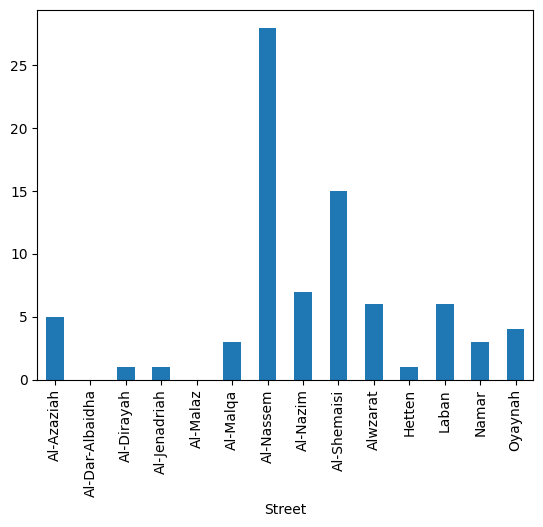

In [16]:
most_sport= ['Street', 'Sport_count']
most_sport= data_riyadh.groupby(['Street'])['sport'].count().plot(kind='bar')

## Where The most **Office** Places in Riyadh?

In [21]:
data_riyadh.office.value_counts()

government                 59
company                    25
diplomatic                  9
telecommunication           7
estate_agent                7
educational_institution     4
foundation                  3
yes                         3
administrative              2
advertising_agency          1
lawyer                      1
association                 1
Name: office, dtype: int64

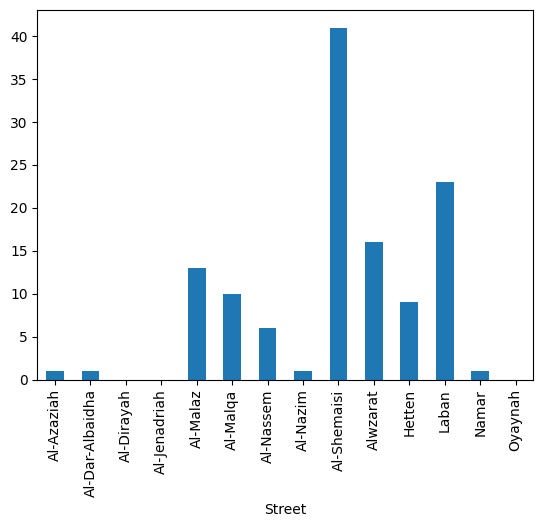

In [22]:
most_office= ['Street', 'office_count']
most_office= data_riyadh.groupby(['Street'])['office'].count().plot(kind='bar')